# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

In [2]:
import pandas, jieba, re
from functools import reduce
import matplotlib.pyplot as plt
from collections import Counter
import jieba

csv = pandas.read_csv('/Users/xianghang/Downloads/sqlResult_1558435.csv', encoding="gb18030")

def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

all_articles = [token(str(a)) for a in csv.content.tolist()]
print("whole txt len: ", len(''.join(all_articles)))
TEXT = ''.join(all_articles)

def cut(s):
    return jieba.lcut(s)

ALL_TOKENS = cut(TEXT)

valida_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']
words_count = Counter(valida_tokens)

whole txt len:  37412506


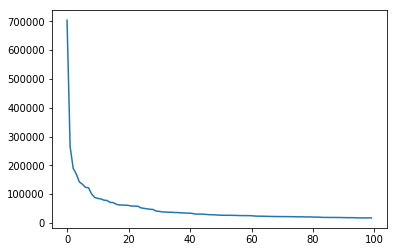

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(range(len(words_count.most_common(100))))
y = [f for w, f in words_count.most_common(100)]
plt.plot(x, y)

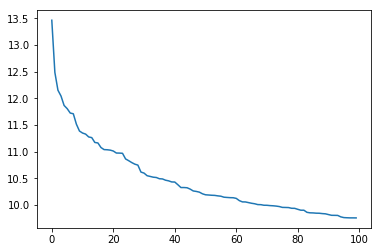

In [4]:
from numpy import log
plt.plot(x, log(y))

In [5]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)

def get_prob(word): 
    esp = 1 / frequences_sum
    if word in words_count: 
        return words_count[word] / frequences_sum
    else:
        return esp

def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

language_model_one_gram('长征火箭下周发射')

1.4511549339176565e-18

In [6]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.873219522813593e-25
---- 真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
---- 我去吃火锅，今晚 with probility 6.876097222574346e-26
---- 今晚我去吃火锅 with probility 1.1841866800627252e-18


In [7]:
# 2-gram
valid_tokens = [str(t) for t in valida_tokens]

all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum

def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

get_prob_2_gram('去', '沈阳')

0.0006857770649650213

In [8]:
def langauge_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

langauge_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

4.5133725473313174e-18

In [9]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = langauge_model_of_2_gram(s1), langauge_model_of_2_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 6.82225584071837e-14
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

Ans:    
1. git init/git commit -m "xxx" file/git checkout/git pull/git push    
2. easier to get result and modify code and graphing by using Jupyter
3. Pycharm is an Integrated Development Environment, it has suits of plugins to help you code/debug/test/manage project etc...

##### 2. What's the Probability Model?

Ans:    
A probability model is a mathematical representation of a random phenomenon. It is defined by its sample space, events within the sample space, and probabilities associated with each event.

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:   
1. random action with a ranged probability   
2. gamble   
3. weather report
4. election forecast   

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


Ans:   
1. it's convincing by giving you all the possibilities based on history
2. a. how to define events based on the problem we want to solve   
   b. casual relation    
   c. data processing, cost of time

##### 5. What's the Language Model;

Ans: 
Language Model is a model that can tell you the probability of one sentence shows in some context.

#####  6. Can you came up with some sceneraies at which we could use Language Model?

Ans:   
1. fruad detection in article   
2. translation   
3. hand write recognition   
4. speech recognition   

##### 7. What's the 1-gram language model;

Ans: the possibility of word showing in this sentence only related to this word itself.

##### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:    
Pros: a. fast calculation b. easy to implement    
Cons: a. less convincing b. easily influenced by some high frequency words 

##### 9.  What't the 2-gram models; 

Ans: the possibility of word showing in sentence is related to its previous word.

##### 10. what's the web crawler, and can you implement a simple crawler? 

Ans:   
1. a program can grab info from internet   
2. yes

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

Ans:   
1. frequency check/cookie issue/bot checking/platform checking/etc...   
2. distributed crawler/using tools/add random action   

##### 12. What't the Regular Expression and how to use?

Ans:   
1. a sequence of characters that define a search pattern.   

In [12]:
import re
print(re.match(r'^ab', 'abcdefg'))
print(re.search(r'd.*', 'abcdefg').group())

<_sre.SRE_Match object; span=(0, 2), match='ab'>
defg


## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor

Step 3: Using the technologies and methods to finish the language model; 
> 

Step 4: Try some interested sentence pairs, and check if your model could fit them

> 

Step 5: If we need to solve following problems, how can language model help us? 

+ Voice Recognization.
+ Sogou *pinyin* input.
+ Auto correction in search engine. 
+ Abnormal Detection.

In [56]:
# step 3 & 4
import json
from hanziconv import HanziConv

all_text = []
for i in range(100):
    with open('/Users/xianghang/Downloads/MyNLPCourse/wikiextractor/text/AA/wiki_%02d'%i,'r') as f:
        for line in f.readlines():
            all_text.append(HanziConv.toSimplified(json.loads(line)['text']))

In [62]:
all_words = [word for word in jieba.cut(text) 
                  for text in all_text 
                  if re.search(u'[\u4e00-\u9fff]', word)]
word_counter = Counter(all_words)
total_words = len(all_words)

In [66]:
def getProb(word):
    if word in word_counter:
        return word_counter[word] / total_words
    else:
        return 1 / total_words

def language_model_one_gram(sent):
    return product([getProb(w) for w in jieba.cut(sent)])

In [81]:
print(language_model_one_gram('中国和德国合作'))
print(language_model_one_gram('中国和美国合作'))
print(language_model_one_gram('日本和美国合作'))

6.263789032335612e-19
2.277741466303859e-19
2.277741466303859e-19


In [82]:
all_2words = [''.join(all_words[i:i+2]) for i in range(total_words-1)]
total_2words = len(all_2words)
word2_counter = Counter(all_2words)

def getProb2Gram(w1, w2):
    combProb = word2_counter[w1+w2] / total_2words if w1+w2 in word2_counter else 1 / total_2words
    return combProb / getProb(w1)
    
def language_model_two_gram(sent):
    ret_prob = 1
    cutted = jieba.lcut(sent)
    for i, w in enumerate(cutteded):
        ret_prob *= getProb(w) if i==0 else getProb2Gram(cutted[i-1],w)
    return ret_prob

In [83]:
print(language_model_two_gram('中国和德国合作'))
print(language_model_two_gram('中国和美国合作'))
print(language_model_two_gram('日本和美国合作'))

2.0084355458375287e-18
5.523197751053203e-18
5.523197751053203e-18


### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

Pros: 
a. easy to deploy 
b. convincing result 
c. Strong anti-interference ability

Cons: 
a. highly cost when data processing at each word 
b. based on history, no good at new thing 
c. not good at when space distribution is too uniform

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

Ans:    
1. guessing the word based on its alphabet   
2. guessing the word based on its sentence
3. guessing the word based on its full context

Then, the sencond question is: 

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37

> coding in here